<a href="https://colab.research.google.com/github/Davidgr11/Computational_Intelligence_AI_DataMining/blob/main/Perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas
import numpy
from matplotlib import pyplot
from sklearn.datasets import load_iris

In [ ]:
iris=load_iris()
datos=pandas.DataFrame(
    data=numpy.c_[iris['data'],iris['target']],
    columns=iris['feature_names']+['target']
)
datos

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


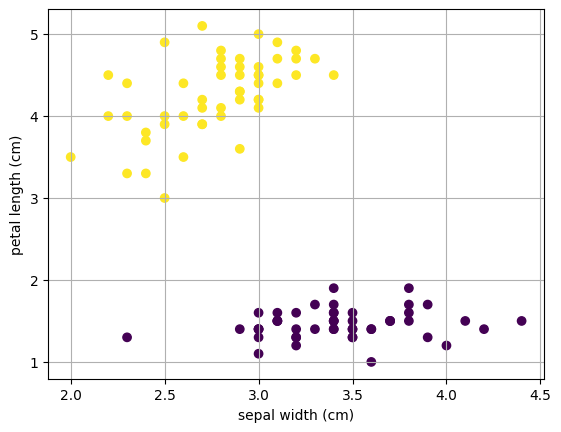

In [ ]:
pyplot.scatter(datos.iloc[:,1],
               datos.iloc[:,2],
               c=datos['target']
               )
pyplot.xlabel(datos.iloc[:,1].name)
pyplot.ylabel(datos.iloc[:,2].name)
pyplot.grid(True)
pyplot.show()

In [ ]:
datos=datos.drop(datos[datos['target']==2].index)
datos

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1.0
96,5.7,2.9,4.2,1.3,1.0
97,6.2,2.9,4.3,1.3,1.0
98,5.1,2.5,3.0,1.1,1.0


In [ ]:
pyplot.scatter(datos.iloc[:,1],
               datos.iloc[:,2],
               c=datos['target']
               )
pyplot.xlabel(datos.iloc[:,1].name)
pyplot.ylabel(datos.iloc[:,2].name)
pyplot.grid(True)
pyplot.show()

In [ ]:
y=datos['target']
X=datos.iloc[:,1:3]
X

,sepal width (cm),petal length (cm)
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4
...,...,...
95,3.0,4.2
96,2.9,4.2
97,2.9,4.3
98,2.5,3.0


In [ ]:
X['bias']=1.0
X

<ipython-input-12-42080e297fef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['bias']=1.0


,sepal width (cm),petal length (cm),bias
0,3.5,1.4,1.0
1,3.0,1.4,1.0
2,3.2,1.3,1.0
3,3.1,1.5,1.0
4,3.6,1.4,1.0
...,...,...,...
95,3.0,4.2,1.0
96,2.9,4.2,1.0
97,2.9,4.3,1.0
98,2.5,3.0,1.0


In [ ]:
pesos=[1.0,1.0,1.0]
pesos

[1.0, 1.0, 1.0]

In [ ]:
hist_pesos=[]
max_iter=int(input('Escribe el número de epochs'))
error=1
epoc=0
tasa=0.1
errores=[]
hist_pesos.append(pesos.copy())

Escribe el número de epochs10


In [ ]:
while epoc<max_iter and error != 0:
  error=0
  for i in X.index:
    suma=X.iloc[i,0]*pesos[0]+X.iloc[i,1]*pesos[1]+X.iloc[i,2]*pesos[2]
    if suma<=0:
      salida=0
    else:
      salida=suma
    if round(salida,ndigits=None)!=y.loc[i]:
      error+=1
      pesos[0]=pesos[0]+tasa*(y.loc[i]-salida)*X.iloc[i,0]
      pesos[1]=pesos[1]+tasa*(y.loc[i]-salida)*X.iloc[i,1]
      pesos[2]=pesos[2]+tasa*(y.loc[i]-salida)*X.iloc[i,2]

  #print(error)
  errores.append(error)
  hist_pesos.append(pesos.copy())
  epoc+=1


In [ ]:
print(errores)

[28, 37, 34, 22, 31, 5, 0]


In [ ]:
pendiente=-1*(pesos[0]/pesos[1])
ordenada=-1*pesos[2]/pesos[1]

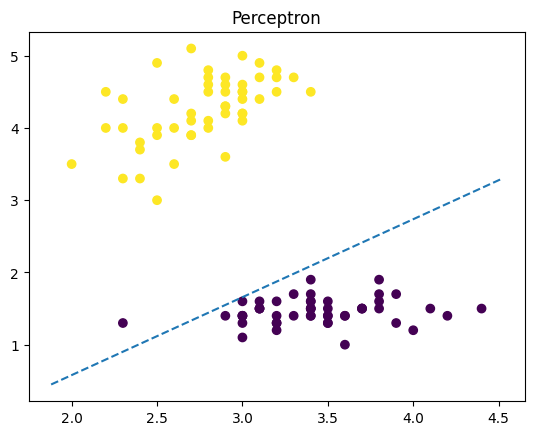

In [ ]:
fig,ax=pyplot.subplots()
pyplot.scatter(datos.iloc[:,1],
               datos.iloc[:,2],
               c=datos['target']
               )
xvals=numpy.array(ax.get_xlim())
yvals=ordenada+pendiente*xvals
pyplot.plot(xvals,yvals,'--')
pyplot.title('Perceptron')
pyplot.show()